<a href="https://colab.research.google.com/github/kiakass/machine-learning/blob/main/AML_Calculation_simplify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

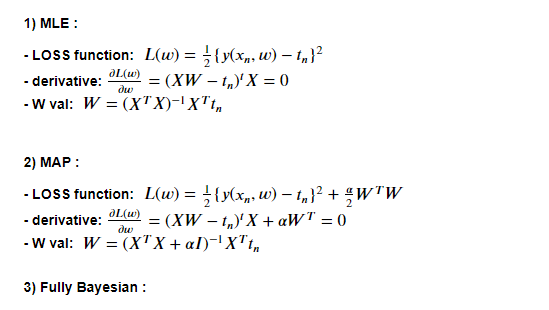

In [ ]:
from IPython.display import Image
url = 'https://raw.githubusercontent.com/kiakass/machine-learning/main/basian_approach.png'
Image(url,width = 600, height = 300)

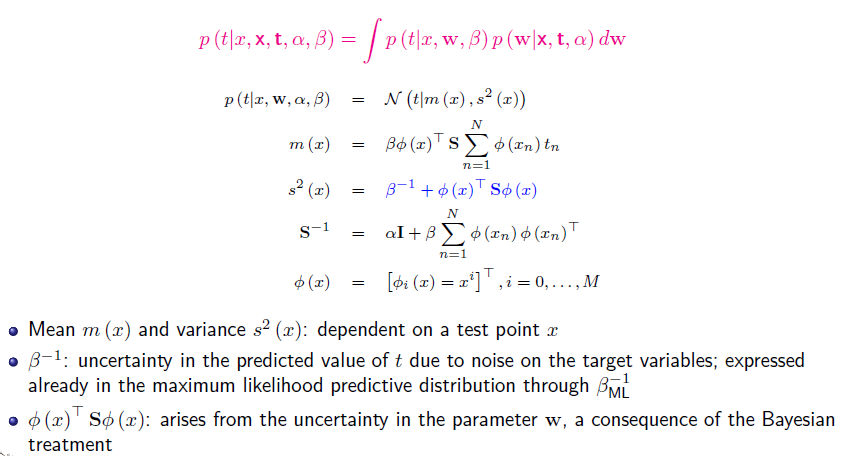

In [ ]:
url='https://raw.githubusercontent.com/kiakass/share/master/fully_bayesian.png'
Image(url,width = 600, height = 400)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp, scipy.stats
import pandas as pd
np.set_printoptions(linewidth=100)  # line 길이를 늘임

class Bayes():

  def __init__(self,):
      """
      :param commonly
      
      :param mean: mean = 0 given in advane
      :param beta: beta = 11.1 given in advane, equal to 1/(square of sigma)
      :param beta: num = number of input x
      :param learning_rate: alpha on weight update
      """
  def Generate_input_x(self, x, M):
      '''
      : convert x to polynomial value & create matrix
      '''
      return np.matrix([X**i for i in range(M+1)])

  def Generate_target_t(self, x,m,beta,num):
      '''
      : generate target t 
      '''
      np.random.seed(1234)
      epsilon = sp.stats.norm(m,beta**-1).rvs(num)
      return np.sin(2*np.pi*x) + epsilon

  def Calculate_w(self, X, M, T, alpha=None,est=None):
      '''
      : MLE : w = (x.T*x)^-1 * x.T * t :  w value
      : MAP : w = (x.T*x + alpha*I)^-1 * x.T * t :  w value
      '''
      A = np.dot(pi_x, pi_x.T)
      B = np.dot(pi_x,np.array(T).reshape(100,-1))

      if est == "MAP":
        A += alpha*np.identity(M+1)
      
      return np.dot(A.I,B).reshape(10,-1)

  def Calculate_fully_bayes(self, pi_x,T,M, alpha, beta):
      '''
      : fully bayesian calculate
      : p(t|x,w,alpha,beta) = N(t|m(x),var)
      '''
      # 공분산
      S_1 = alpha*np.identity(10) + beta*np.dot(pi_x,pi_x.T)
      # 평균
      m_x = beta*np.dot(np.dot(pi_x.T,np.linalg.inv(S_1)),np.dot(pi_x,T.reshape(100,-1)))
      mu = np.squeeze(m_x.tolist())  # matrix를 list로 만들고 차원을 1차원으로 낮추기
      # 분산
      s_x = 1/beta + np.dot(np.dot(pi_x.T,np.linalg.inv(S_1)),pi_x)
      var = np.diag(s_x) # iid 가정이므로 diagonal 값만 뽑아내야됨, 
      FB_predict = [ np.random.normal(i,j) for i,j in zip(mu, var) ]

      return FB_predict, mu, var

  def predict(self, w,x):
      return np.squeeze(np.dot(w.T,x).tolist()) # convert 1-dimension

  def make_plot(self, X,Y,type=None,label=None):
      plt.plot(X,Y,type,label=label)      
      plt.legend()

  def make_plot_fill(self, X,up,down,label=None):
      plt.fill_between(X,up,down,facecolor='yellow',alpha=0.2,color='pink',label=label)      
      plt.legend()

          MLE        MAP
w0  -0.012824  -0.001181
w1   6.183572   4.040878
w2   0.474345   0.096157
w3 -39.910660 -18.738964
w4  -2.200289  -0.259571
w5  73.540813  13.894664
w6   3.437768   0.246857
w7 -55.620831   8.461257
w8  -1.734743  -0.097790
w9  15.786838  -7.544975


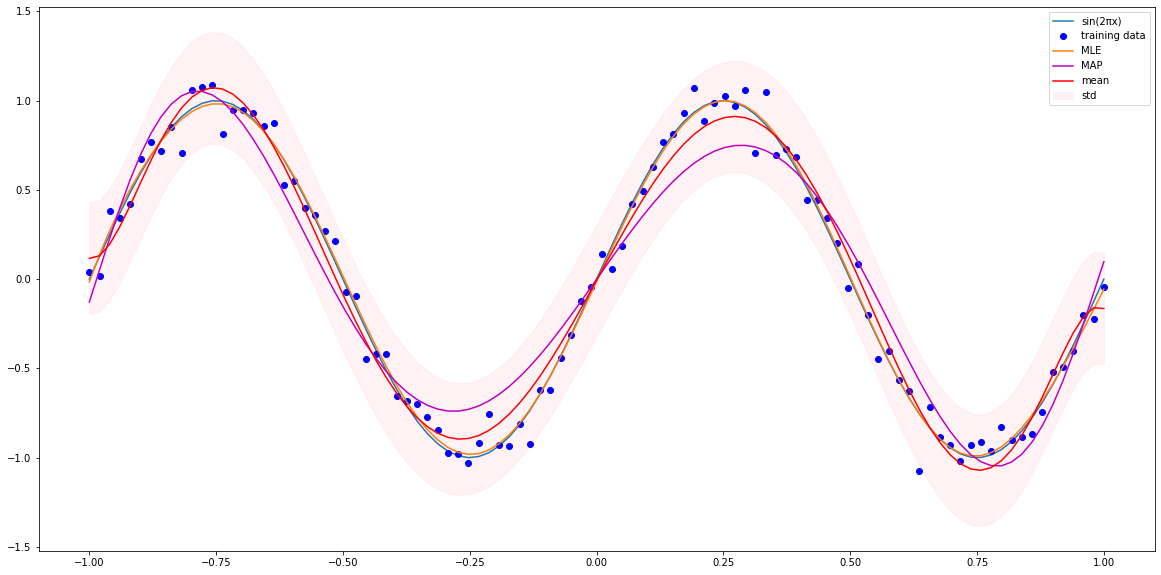

In [ ]:
if __name__ == "__main__":

  # init value
  mean = 0
  beta = 11.1
  alpha = 5*10**(-3) #learning rate is indicated in advance 

  num = 100  # number of input x
  M = 9      # polynomial order

  X = np.linspace(-1,1,num)
  Y = np.sin(2*np.pi*X)

  MLE = Bayes()
  T = MLE.Generate_target_t(X,mean,beta,num)

  plt.figure(figsize=(20,10))
  MLE.make_plot(X,Y,'-','sin(2πx)')  
  MLE.make_plot(X,T,'bo',"training data")  
  # w for pandas index 
  col = [ 'w'+str(i) for i in range(M+1) ]

  # Φ(x) : polynomial [x**i]
  pi_x = MLE.Generate_input_x(X,M)

  # get MLE
  est='MLE' 
  w_mle=MLE.Calculate_w(pi_x,M,T,alpha,est)
  MLE_prediction = MLE.predict(w_mle,pi_x)
  make_plot(X,MLE_prediction,'-',est)  

  # get MAP
  est='MAP' 
  w_map=MLE.Calculate_w(pi_x,M,T,alpha,est)
  MAP_prediction = MLE.predict(w_map,pi_x)
  make_plot(X,MAP_prediction,'m-',est)

  # get FULLY Bayesian
  FB_predict, mu, var = MLE.Calculate_fully_bayes(pi_x,T,M, alpha, beta)

  sigma=np.average(np.sqrt(var))
  std = np.array([ (i+sigma, i-sigma) for i in mu])

  MLE.make_plot(X,mu,'r-',label='mean') 
  MLE.make_plot_fill(X,std[:,0],std[:,1],label='std') 

  # compare w between MLE,MAP
  print_w = pd.DataFrame(w_mle, index=col, columns=['MLE'])
  print_w['MAP'] = pd.DataFrame(w_map, index=col, columns=['MAP'])
  print(print_w)


# #### END

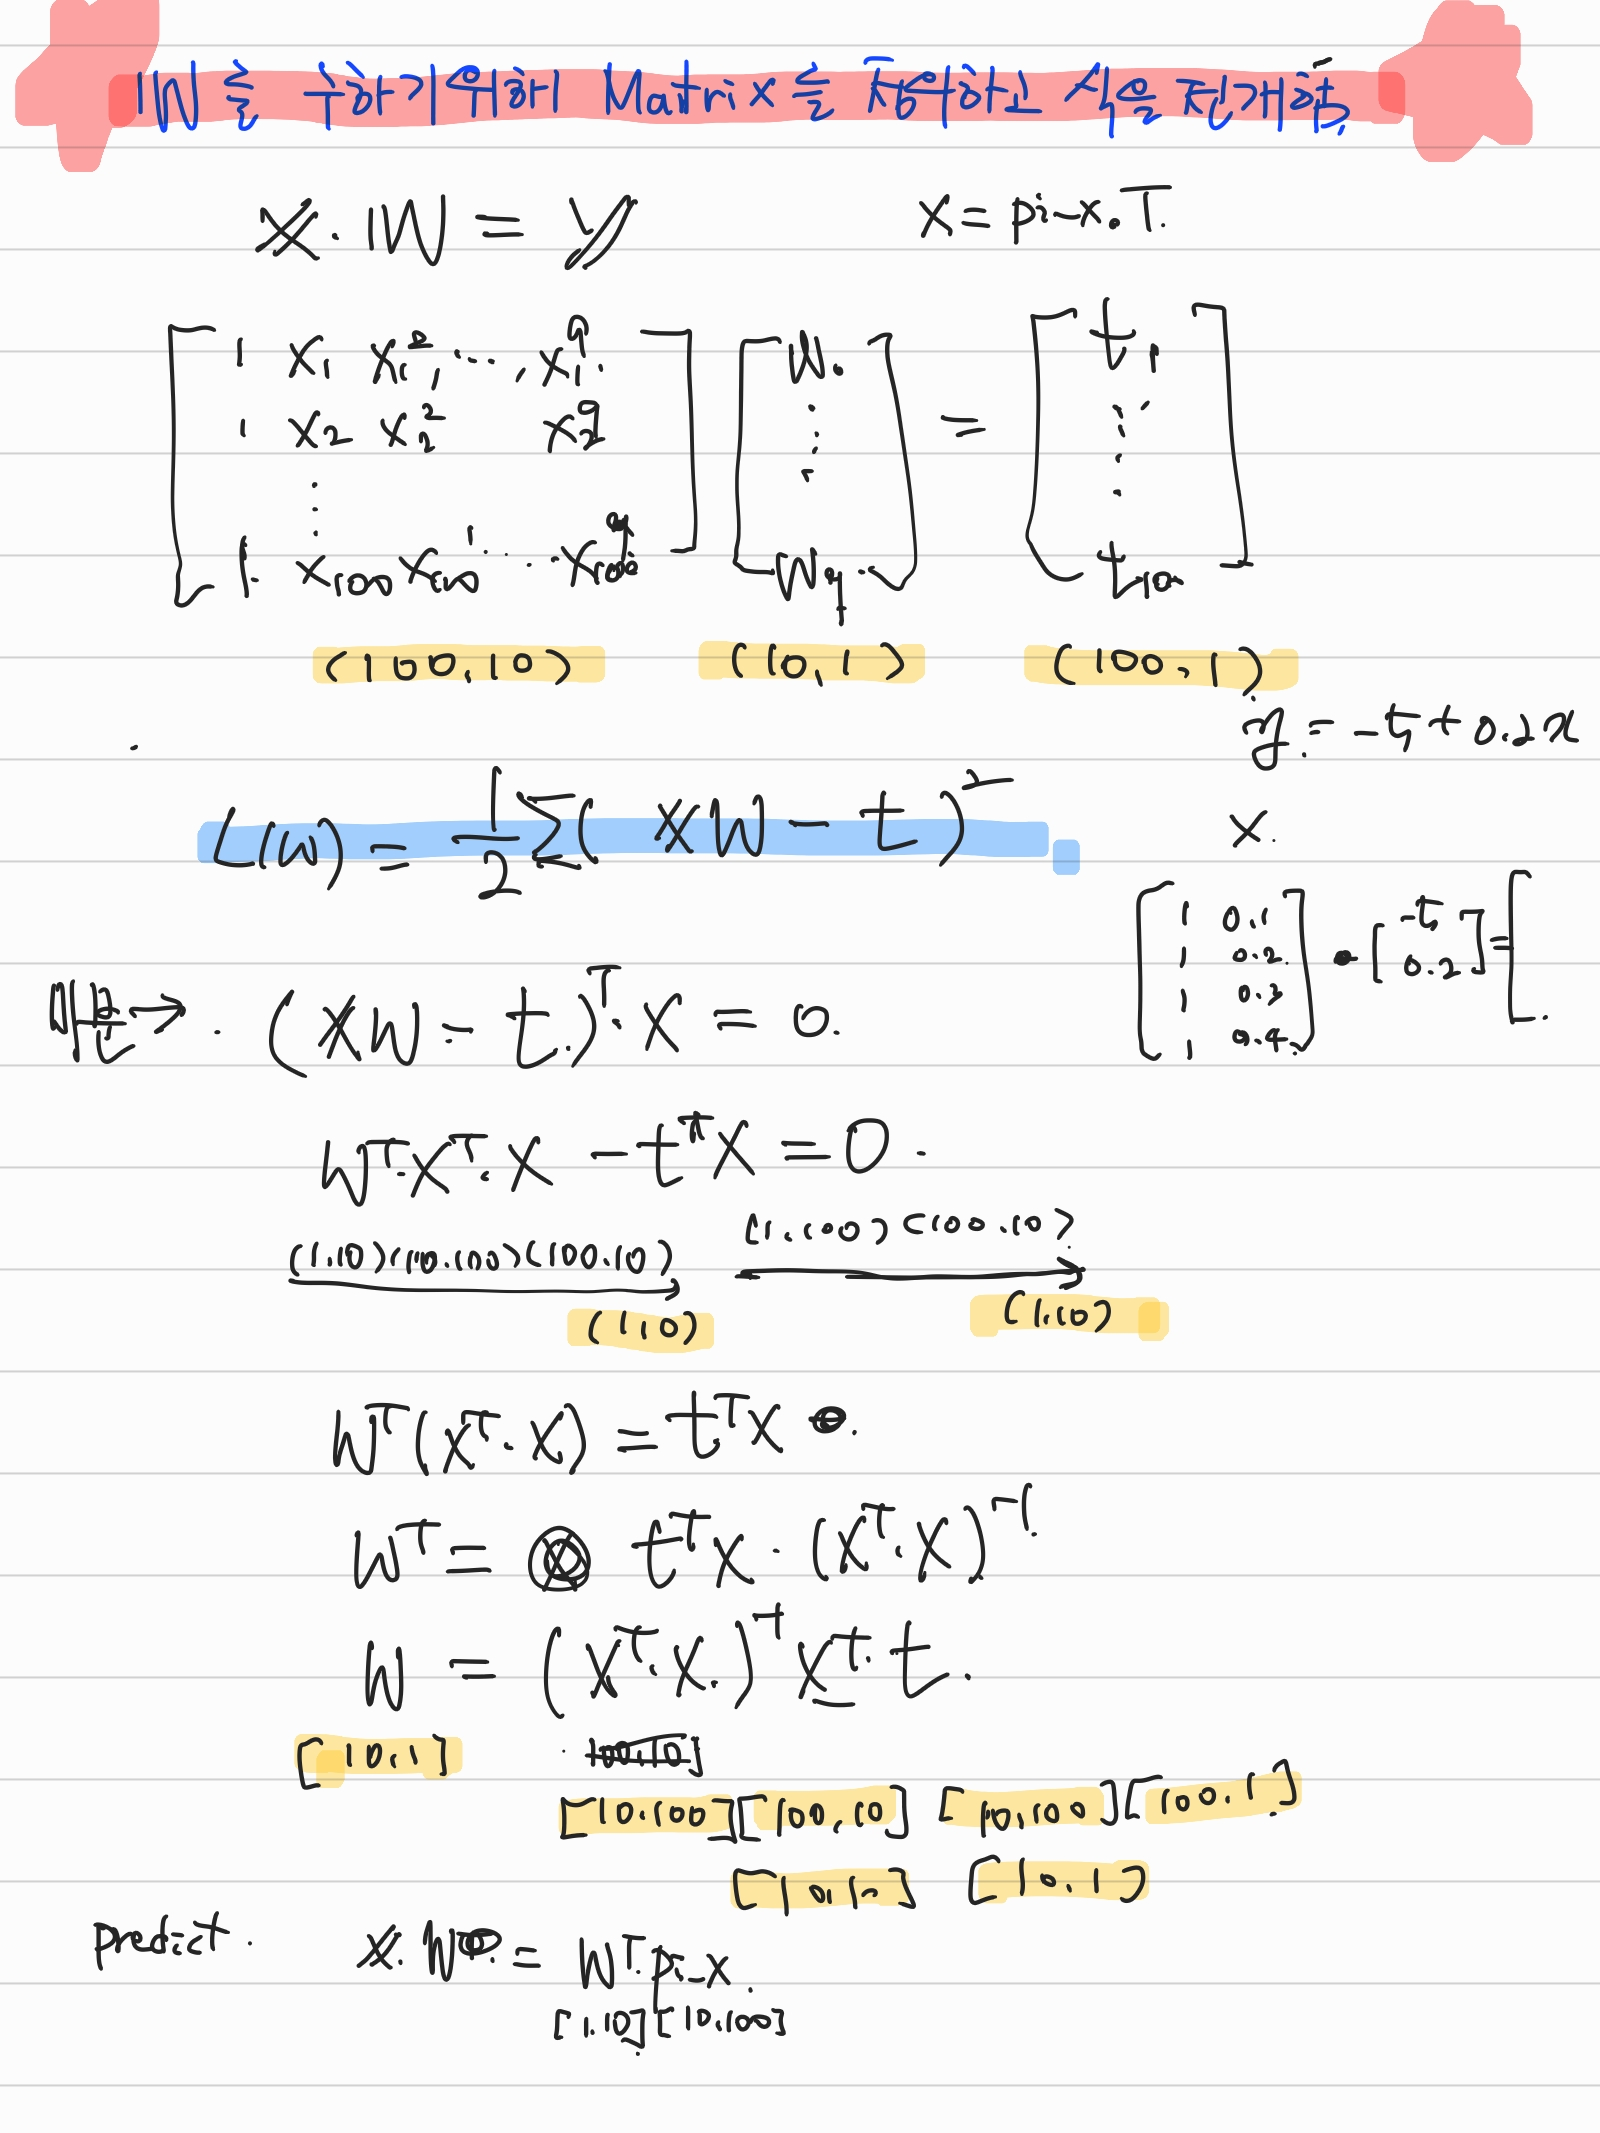

In [6]:
from IPython.display import Image
url = 'https://raw.githubusercontent.com/kiakass/machine-learning/main/aml_mle.jpg'
Image(url,width = 300, height = 400)

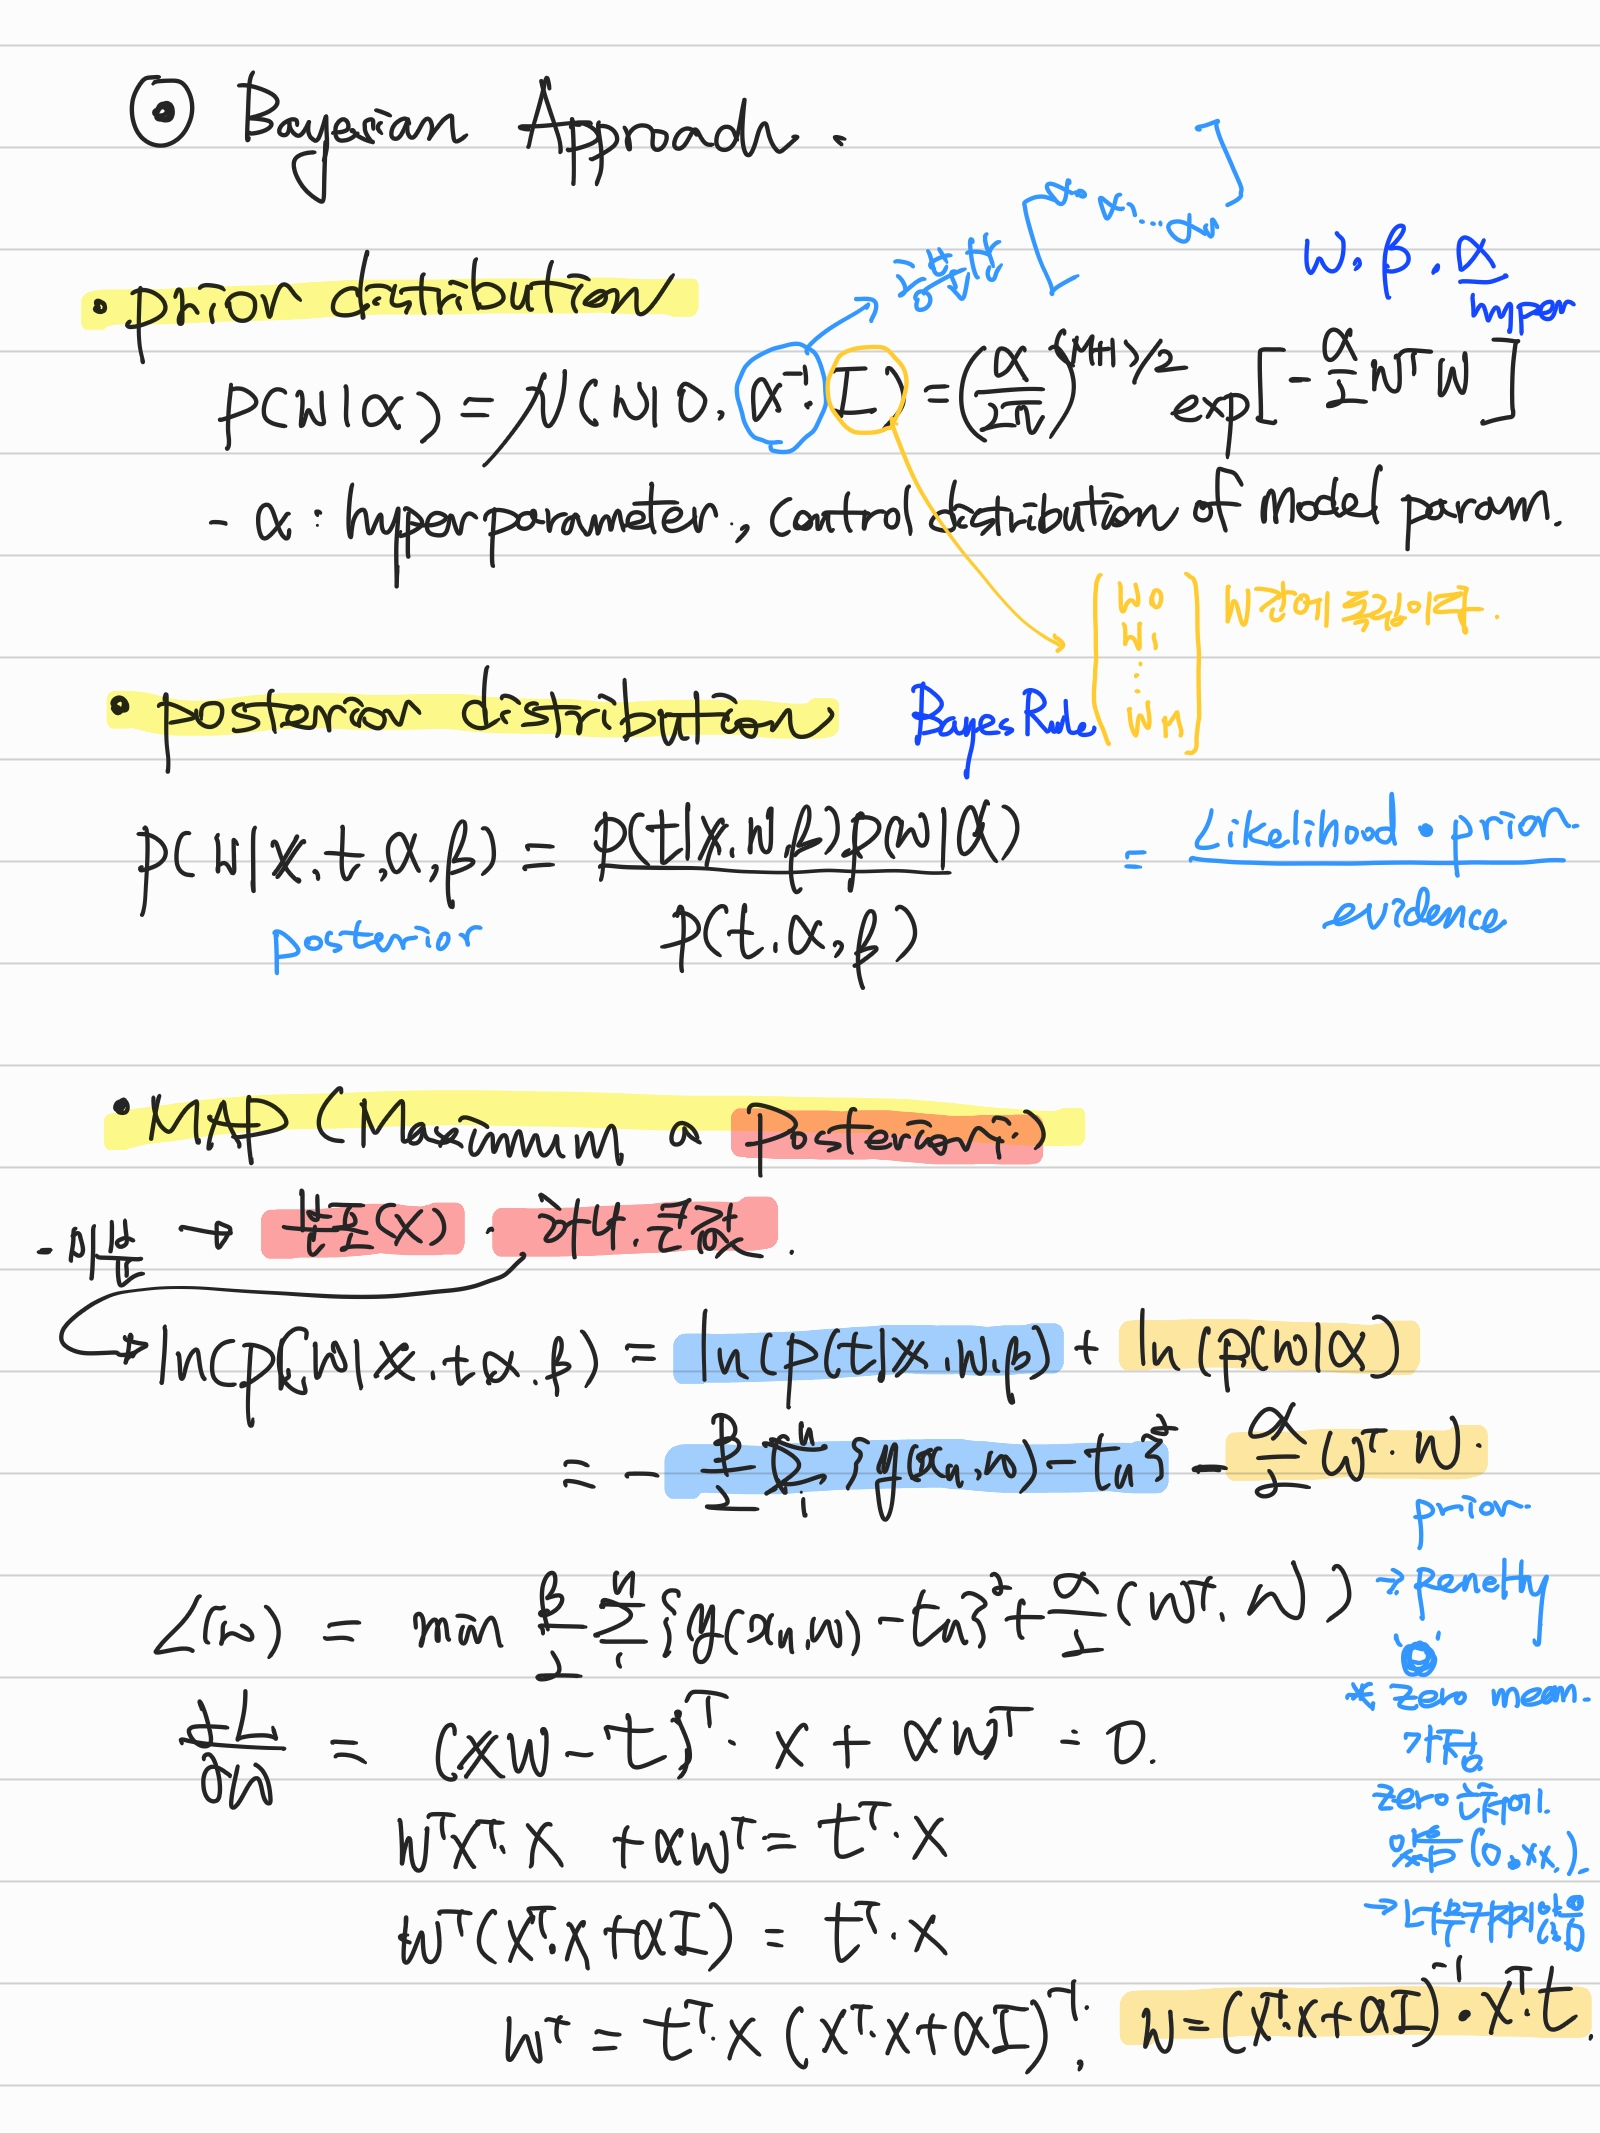

In [7]:
url = 'https://raw.githubusercontent.com/kiakass/machine-learning/main/aml_map.jpg'
Image(url,width = 300, height = 400)

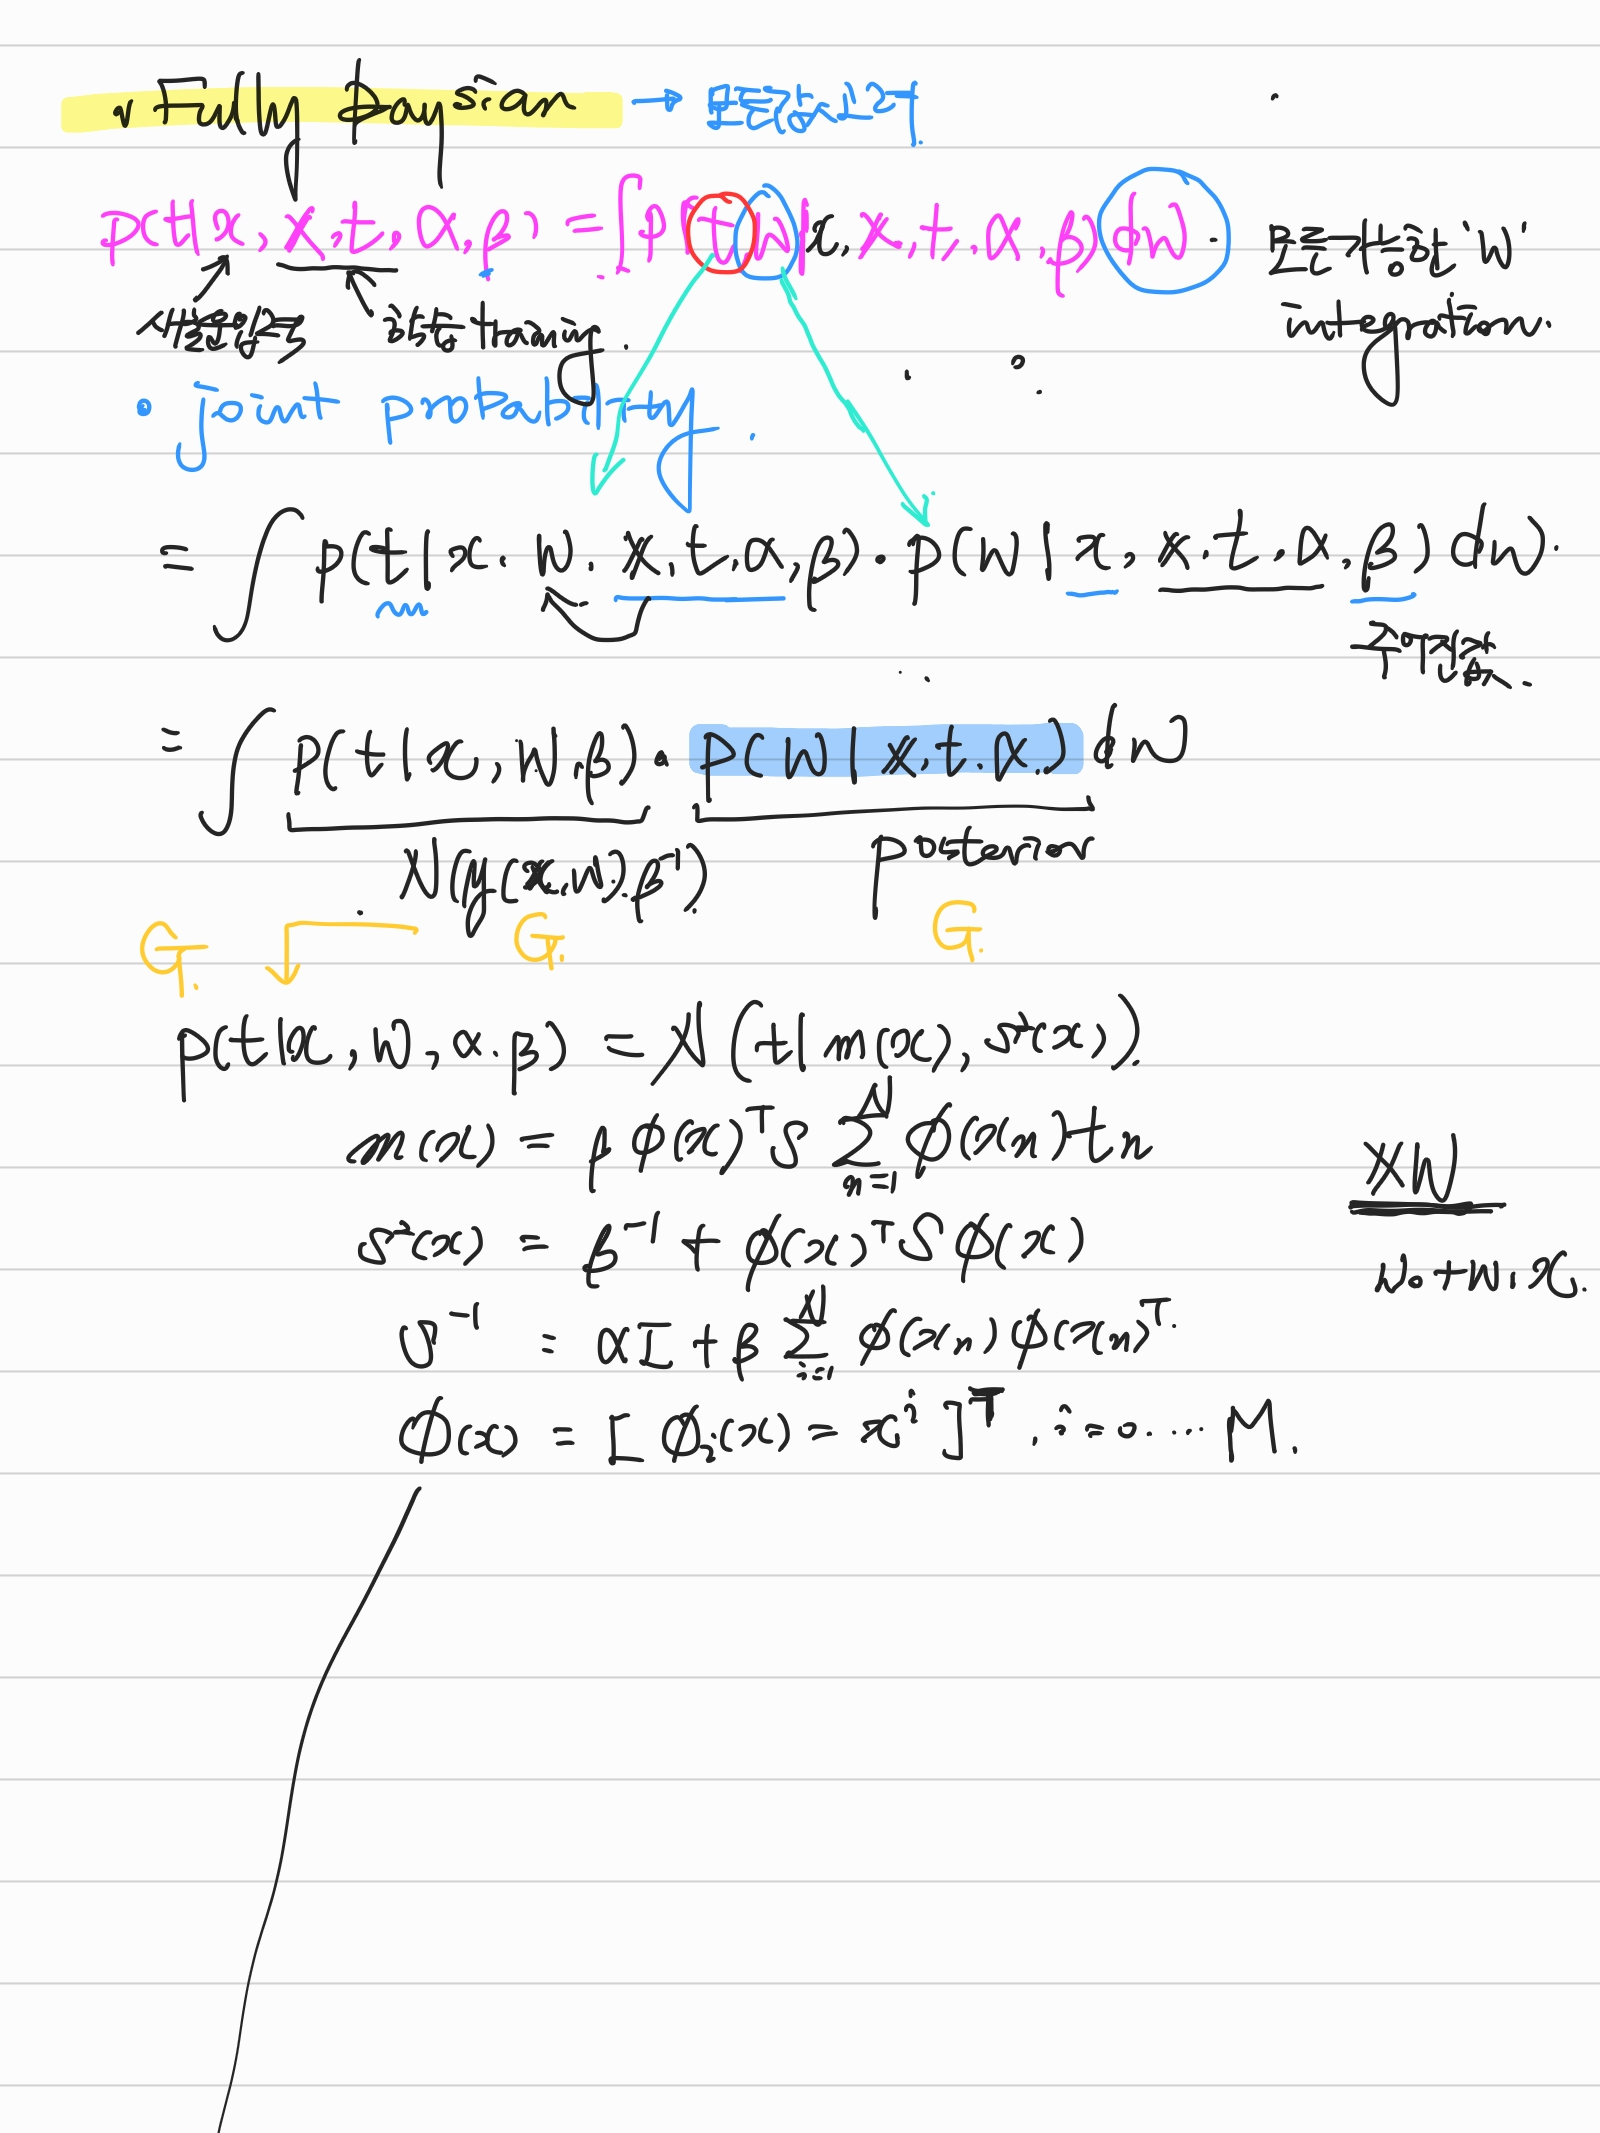

In [8]:
url = 'https://raw.githubusercontent.com/kiakass/machine-learning/main/aml_bayesian1.jpg'
Image(url,width = 300, height = 400)

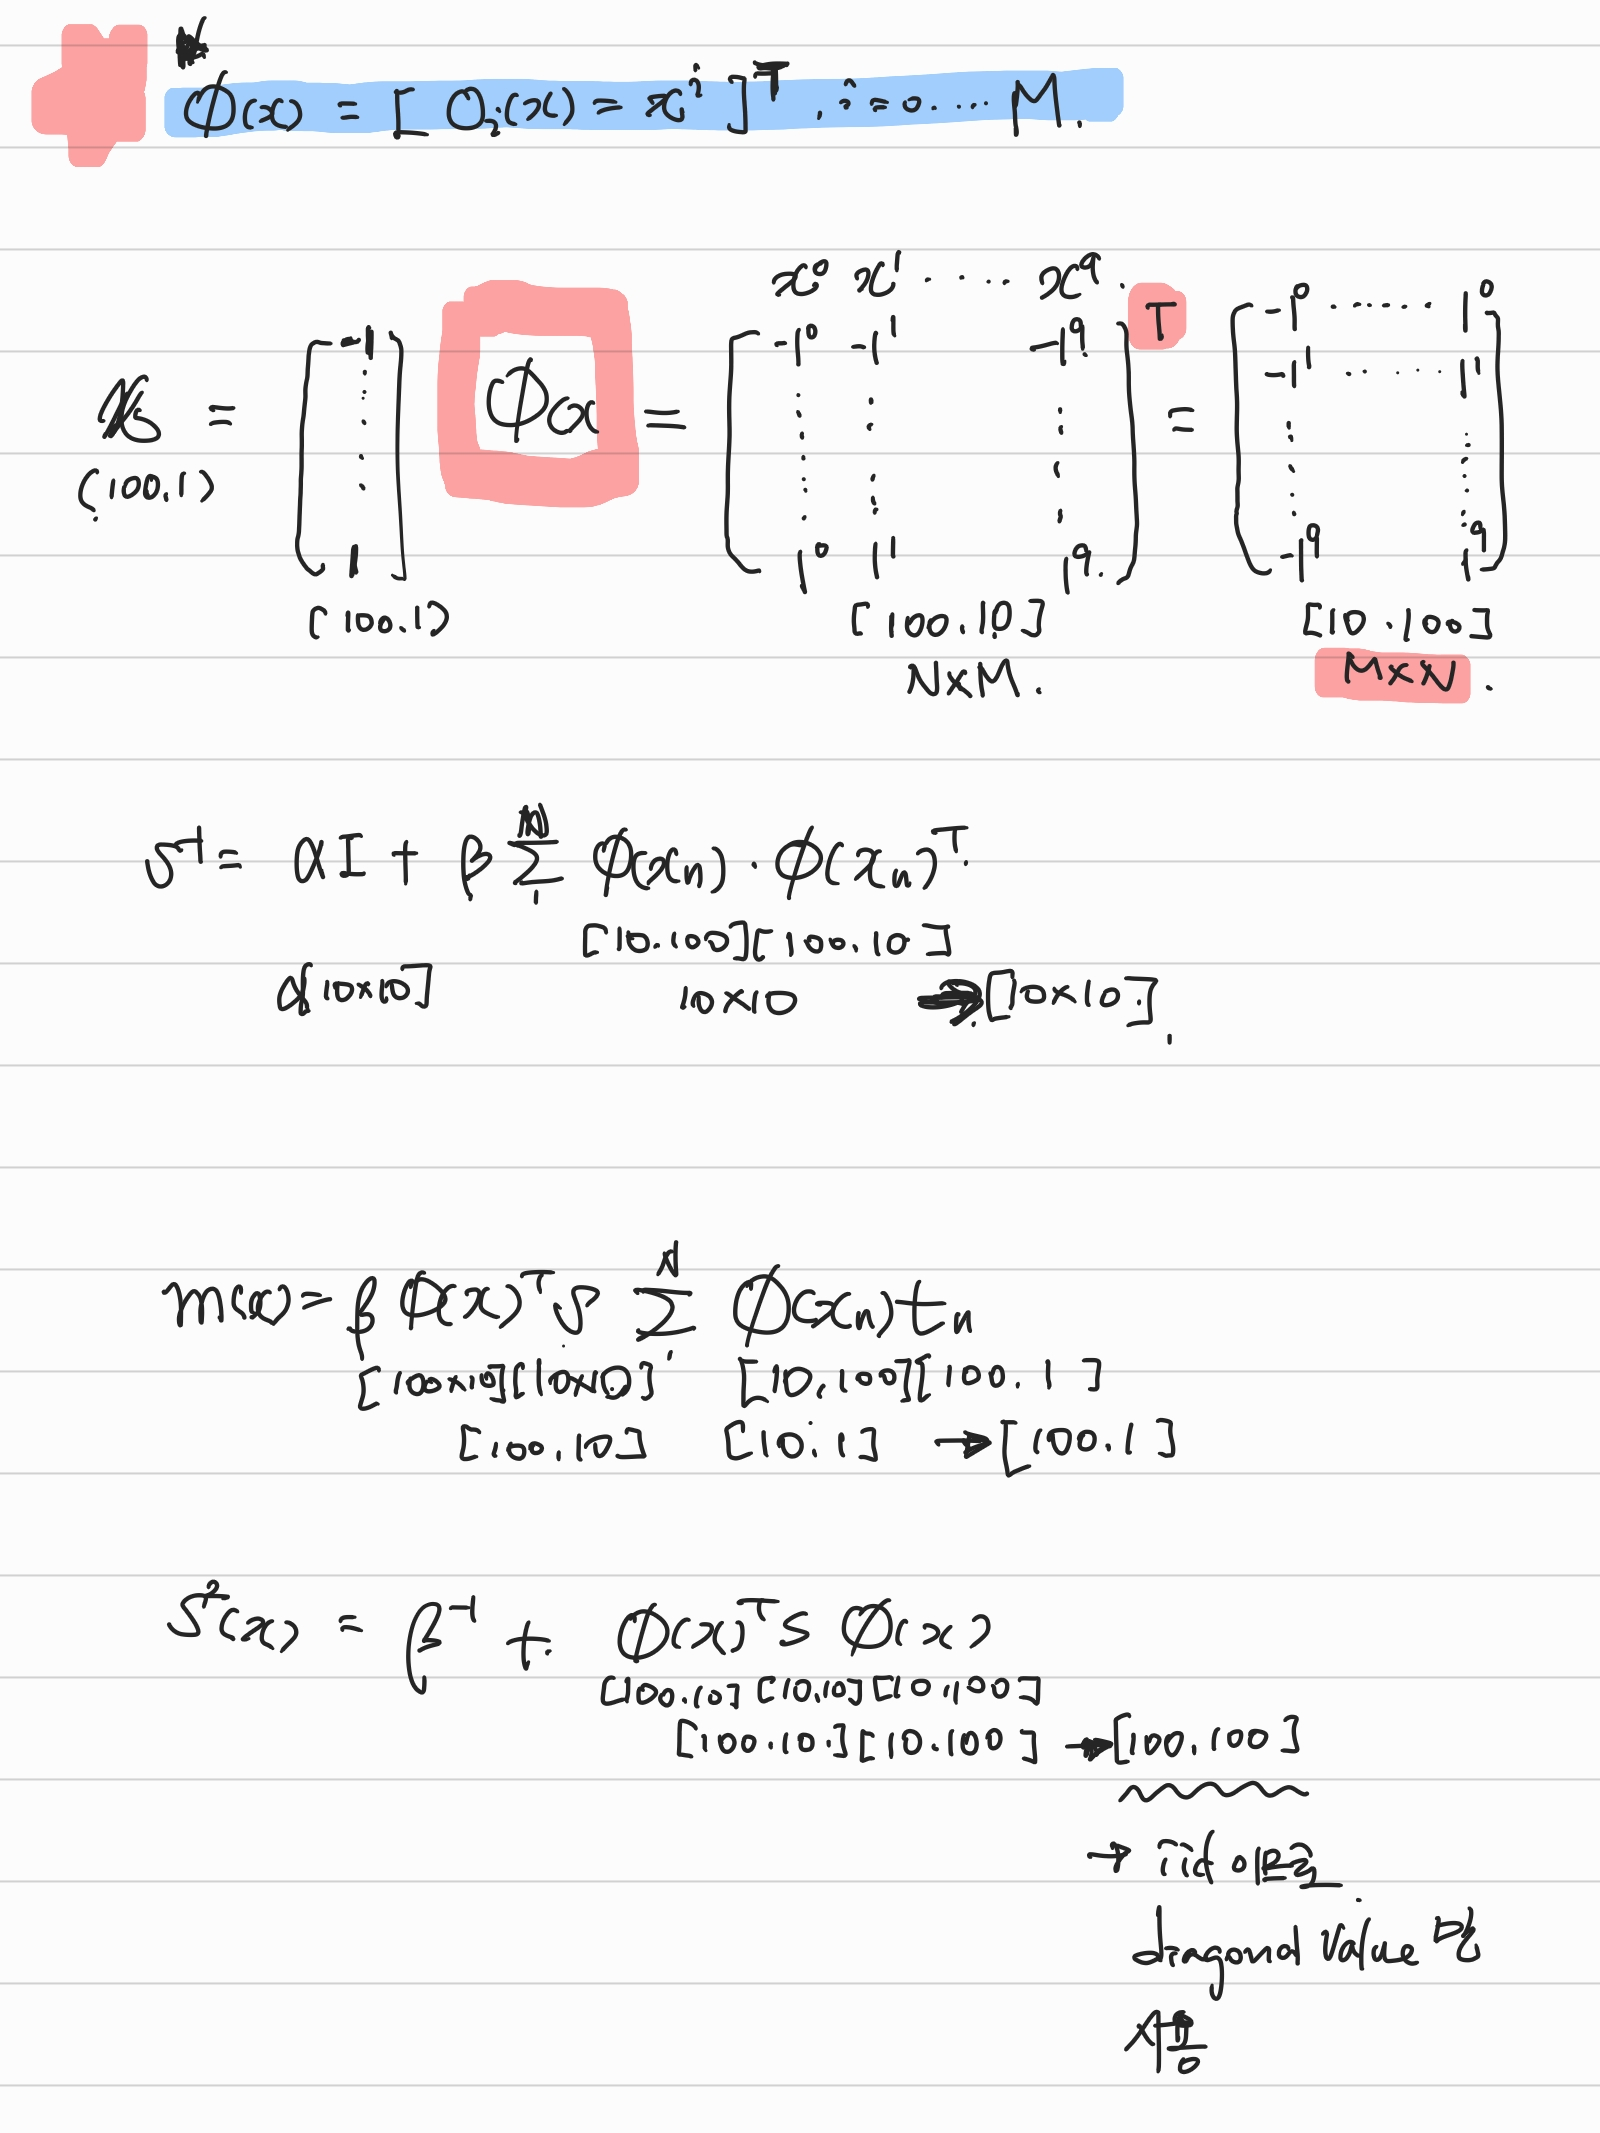

In [9]:
url = 'https://raw.githubusercontent.com/kiakass/machine-learning/main/aml_bayesian2.jpg'
Image(url,width = 300, height = 400)